In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql3

sns.set(style="darkgrid")
ROOT_PATH="C:/Users/moshe/Documents/projectML/p1"
DATA_PATH = "%s/data/raw" % ROOT_PATH
DB_FILE = "%s/hairsalon.db" % DATA_PATH
def readSQL(query):
    import pandas as pd
    import sqlite3 as sql3
    db = sql3.connect(DB_FILE)
    df = pd.read_sql_query(query, db)
    db.close()
    return(df)

db=sql3.connect(DB_FILE)
from sklearn.feature_selection import SelectFromModel

In [165]:
query="""select * from finalbooking"""
final=readSQL(query)
for c in final.columns:
    if final[c].nunique() < 14:
        final[c] = final[c].astype('category')
X=final.loc[:,final.columns[1:]]
y=final['noshowflag']

## Univariate Analysis

In [ ]:
import pyMechkar as mechkar
tab1 = mechkar.pyMechkar().Table1(x=varList['Variable'],y="noshowflag",data=final, maxcat=15,miss=3, catmiss=True)

Factorizing... please wait
**************************************************************************************************************************************************************************

In [ ]:
tab1[tab1['p_value']<0.05].head()

In [104]:
vn1 = tab1.loc[tab1['p_value']<0.05,'Variables'].unique()
print(len(vn1))
vn1

16


array(['previousnoshow', 'svcavg', 'x0_wkday-1.0 hour-10.0',
       'x0_wkday-4.0 hour-9.0', 'x0_wkday-5.0 hour-14.0', 'x1_MISC',
       'x1_STYLE', 'x2_CBAL', 'x2_CON', 'x2_FRI', 'x2_SHCW',
       'x6_daysnoshow8-15', 'x9_10.0', 'x10_6.0', 'x11_2.0', 'x11_3.0'],
      dtype=object)

In [141]:
varList = pd.DataFrame({'Variable': final.columns[1:]})
print(len(varList))
varList['Univariate'] = 0
varList.loc[varList['Variable'].isin(vn1), 'Univariate'] = 1
varList.head()

179


,Variable,Univariable
0,firstapp,0
1,existingcustomer,0
2,multipleappt,0
3,previousnoshow,1
4,last60dbillamt,0


### Variable Selection using LASSO (L1 penalization)

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
lassomod = LogisticRegression(penalty='l1',random_state=0).fit(X,y)
model = SelectFromModel(lassomod, prefit=True)
varList['Lasso'] = model.get_support().astype('int64')

C:\Users\moshe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Variable Selection using Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
rfc=RandomForestClassifier(random_state=0,n_estimators=100,max_depth=2)
rfmod = RandomForestClassifier().fit(X, y)
model = SelectFromModel(rfmod, prefit=True)
varList['RandomForest'] = model.get_support().astype('int64')

C:\Users\moshe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Variable Selection using gradient boosting

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

gbmod = GradientBoostingClassifier().fit(X, y)
model = SelectFromModel(gbmod, prefit=True)
varList['GradientBoost'] = model.get_support().astype('int64')


### Variable Selection using LinearSVC

In [145]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

svmmod = LinearSVC(C=0.01, penalty="l1",dual=False,random_state=0).fit(X, y)
model = SelectFromModel(svmmod, prefit=True)
varList['LinearSVC'] = model.get_support().astype('int64')

### Variable Selection using XGB

In [146]:
import xgboost as xgb
classifier=xgb.XGBClassifier()
finalnum=final.copy()
finalnum.dtypes
columnstoconvert=finalnum.loc[:,finalnum.dtypes=='category'].columns
finalnum[columnstoconvert]=finalnum[columnstoconvert].astype(bool)
Xnum=finalnum.loc[:,finalnum.columns[1:]]
ynum=finalnum['noshowflag']
finalnum.dtypes
xgbmod=classifier.fit(Xnum,ynum)

In [147]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(xgbmod, prefit=True)
varList['xgb'] = model.get_support().astype('int64')

### Variable Selection using AdaBoost

In [150]:
from sklearn.ensemble import AdaBoostClassifier
adamod=AdaBoostClassifier().fit(X,y)
model = SelectFromModel(adamod, prefit=True)
varList['AdaBoost'] = model.get_support().astype('int64')


### Variable Selection using Decision Tree

In [155]:
from sklearn.tree import DecisionTreeClassifier
treemod=DecisionTreeClassifier().fit(X,y)
model = SelectFromModel(treemod, prefit=True)
varList['DecTree'] = model.get_support().astype('int64')


In [156]:
if 'Sum' in varList.columns:
    varList=varList.drop(columns=['Sum'])
varList['Sum'] =  np.sum(varList,axis=1)

In [159]:
filepath = "C:/Users/moshe/Documents/projectML/p1/data/interim/varList.xlsx"
varList.to_excel(filepath)

### PCA

In [163]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.86614886 0.05431717 0.03351038 0.02893345 0.00994382 0.0068955 ]


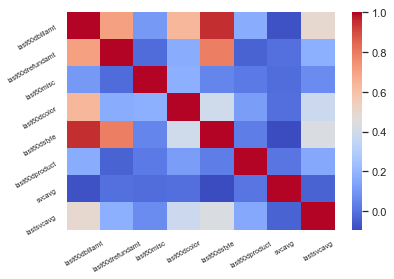